In [2]:
import pandas as pd #pandas as pd: Used for data manipulation and analysis (especially for working with CSVs, DataFrames).
import matplotlib.pyplot as plt #matplotlib.pyplot as plt: Used for plotting graphs and charts.
import numpy as np #numpy as np: Useful for numerical operations and array handling.
import seaborn as sns #seaborn as sns: A statistical data visualization library built on top of matplotlib.
from sklearn.utils import resample #Used to resample datasets
import scipy.stats as stats #Imports statistical functions like: stats.zscore() for outlier detection
from sklearn.model_selection import train_test_split #Splits your dataset into training and testing sets.
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,classification_report, confusion_matrix
"""
accuracy_score – overall correctness
f1_score – balance between precision & recall
precision_score – true positives / predicted positives =TP/TP+FP
recall_score – true positives / actual positives =TP/TP+FN
classification_report – nicely formatted output of multiple metrics
confusion_matrix – confusion matrix table (TP, FP, FN, TN)
"""
from sklearn import metrics #Generic access to all metrics, like metrics.mean_squared_error, etc.
import math #Built-in Python module for mathematical functions, e.g., math.sqrt(), math.log(), math.exp(), etc.
from sklearn.model_selection import cross_val_score, cross_val_predict #cross_val_score():Runs cross-validation and returns model performance scores.cross_val_predict(): Returns the predicted values during cross-validation.
from sklearn.tree import DecisionTreeRegressor #A decision tree used for predicting continuous values (regression task).
from sklearn.ensemble import RandomForestRegressor #Uses an ensemble of decision trees to improve regression accuracy and reduce overfitting.
from sklearn.ensemble import AdaBoostRegressor #Boosting model for regression tasks, where multiple weak regressors are combined iteratively.
from sklearn.tree import DecisionTreeClassifier #Builds a single decision tree model — interpretable, but can overfit if not pruned.
from sklearn.neighbors import KNeighborsClassifier #K-Nearest Neighbors classifier. Simple, intuitive model based on closeness of data points.
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier 
#Ensemble of decision trees for robust classification. Great at handling both classification and regression.
#Boosting method that combines multiple weak learners (usually decision stumps) to form a strong classifier.
from sklearn.linear_model import LogisticRegression #Logistic regression model for binary or multi-class classification. Simple, fast, and interpretable.
sns.set_theme(color_codes=True) #sns.set_theme(color_codes=True): Sets the visual theme for seaborn plots with color code support enabled.

In [3]:
df= pd.read_csv('dataset_phishing.csv')
df

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,...,1,0,0,211,6728,0,0,1,0,phishing
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate


<Axes: xlabel='domain_with_copyright', ylabel='count'>

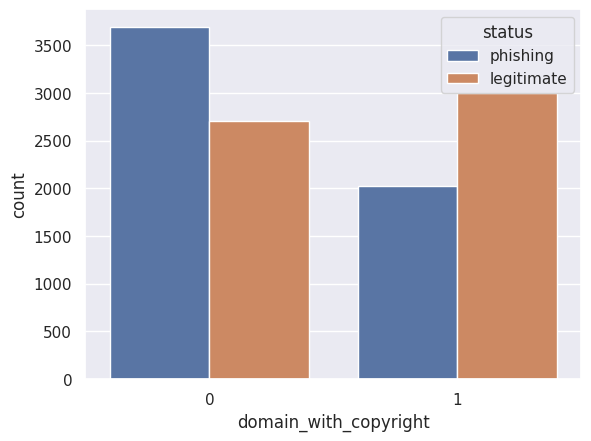

In [4]:
sns.countplot(data=df,x='domain_with_copyright',hue='status')

<Axes: xlabel='page_rank', ylabel='Count'>

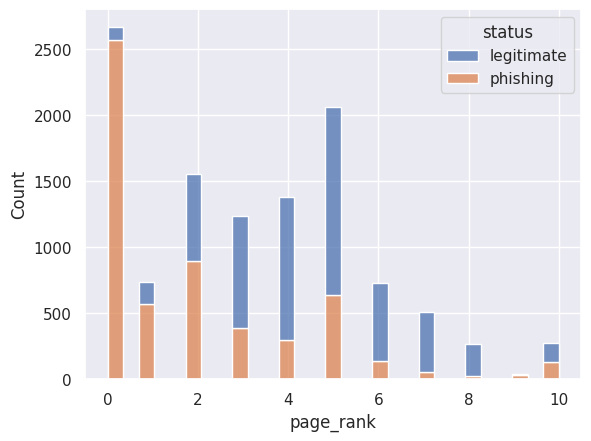

In [5]:
sns.histplot(data=df,x='page_rank',hue='status',multiple='stack') 

In [10]:
for col in ["url","length_url","length_hostname","ip","nb_dots","nb_hyphens","nb_at","nb_qm","nb_and","nb_or","nb_eq","nb_underscore","nb_tilde","nb_percent","nb_slash","nb_star","nb_colon","nb_comma","nb_semicolumn","nb_dollar","nb_space","nb_www","nb_com","nb_dslash","http_in_path","https_token","ratio_digits_url","ratio_digits_host","punycode","port","tld_in_path","tld_in_subdomain","abnormal_subdomain","nb_subdomains","prefix_suffix","random_domain","shortening_service","path_extension","nb_redirection","nb_external_redirection","length_words_raw","char_repeat","shortest_words_raw","shortest_word_host","shortest_word_path","longest_words_raw","longest_word_host","longest_word_path","avg_words_raw","avg_word_host","avg_word_path","phish_hints","domain_in_brand","brand_in_subdomain","brand_in_path","suspecious_tld","statistical_report","nb_hyperlinks","ratio_intHyperlinks","ratio_extHyperlinks","ratio_nullHyperlinks","nb_extCSS","ratio_intRedirection","ratio_extRedirection","ratio_intErrors","ratio_extErrors","login_form","external_favicon","links_in_tags","submit_email","ratio_intMedia","ratio_extMedia","sfh","iframe","popup_window","safe_anchor","onmouseover","right_clic","empty_title","domain_in_title","domain_with_copyright","whois_registered_domain","domain_registration_length","domain_age","web_traffic","dns_record","google_index","page_rank","status"]:
    unique_vals = list(df[col].unique())
    for idx in range(len(unique_vals)):
        df[col]=df[col].replace([unique_vals[idx]],idx) #remember to put [uni..[],idx]
df.shape

(11430, 89)

In [11]:
df.dtypes

url                int64
length_url         int64
length_hostname    int64
ip                 int64
nb_dots            int64
                   ...  
web_traffic        int64
dns_record         int64
google_index       int64
page_rank          int64
status             int64
Length: 89, dtype: object

In [12]:
df.isnull().sum()

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

status
0    5715
1    5715
Name: count, dtype: int64


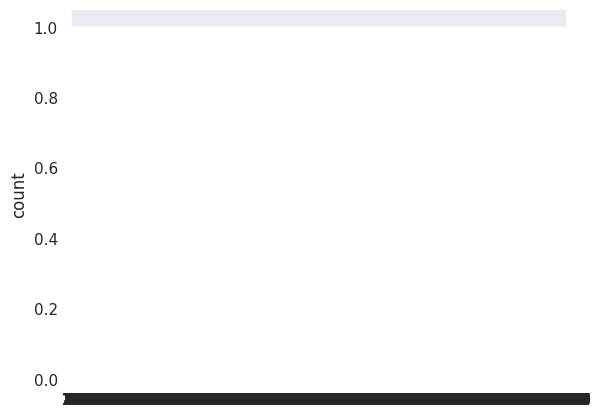

In [13]:
sns.countplot(df.status)
print(df.status.value_counts())

<Axes: xlabel='length_url'>

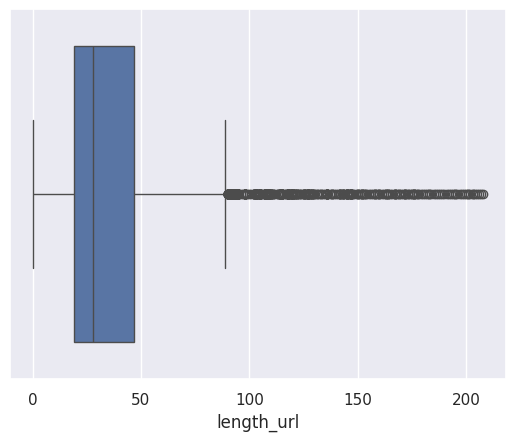

In [14]:
sns.boxplot(x=df["length_url"])

In [15]:
z = np.abs(stats.zscore(df))
data_clean = df[(z<3).all(axis = 1)]
data_clean.shape

(0, 89)

/home/codespace/.local/lib/python3.12/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/codespace/.local/lib/python3.12/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<Axes: >

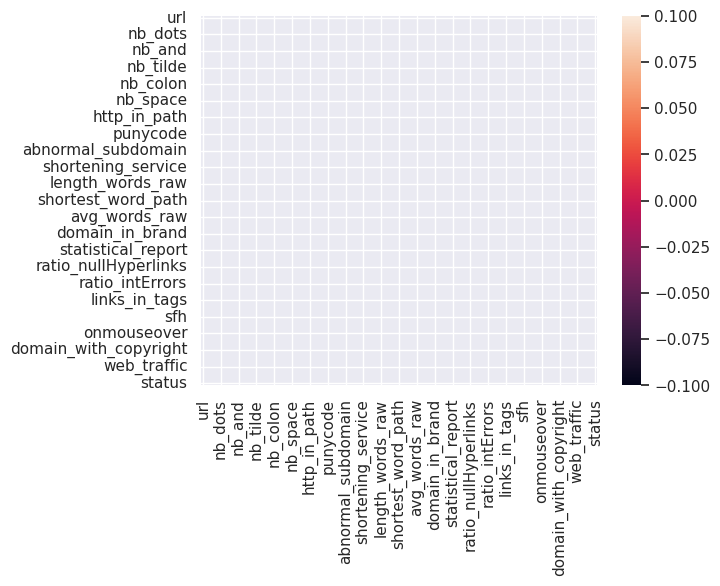

In [16]:
sns.heatmap(data_clean.corr(), fmt='.2g')

In [17]:
x=df.drop('status',axis=1)
y=df.status

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0) # ensures same set of data is used for splitting

In [19]:
def ModelEval(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train) #used to train the model using the training dataset
    y_pred=model.predict(x_test) # Uses the trained model to predict the target values for the test data.
    print("Accuracy Score: ",round(accuracy_score(y_test,y_pred)*100,2),"%") # Overall, how many predictions were correct
    print("F1-Score: ",f1_score(y_test,y_pred)) # Harmonic mean of precision and recall.Best when you want balance between precision and recall(for imbalanced datasets)
    print("Precision Score: ",precision_score(y_test,y_pred)) # Out of the predicted positives, how many were actually positive
    print("Recall Score: ",recall_score(y_test,y_pred)) # Out of the actual positives how many were correctly predicted
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,5))
    sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
    all_sample_title= "Accuracy Score: {0}".format(model.score(x_test, y_test)*100)
    plt.title(all_sample_title,fontsize=12)
    plt.xlabel('Actual label')
    plt.ylabel('Predicted label')
    plt.show()

Accuracy Score:  93.88 %
F1-Score:  0.9375557537912578
Precision Score:  0.945994599459946
Recall Score:  0.9292661361626879


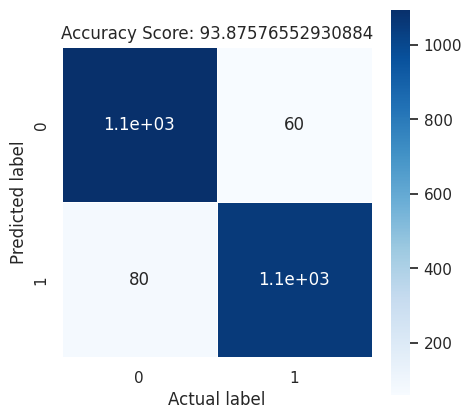

In [20]:
rfc = RandomForestClassifier(random_state=0)
ModelEval(rfc,x_train,x_test,y_train,y_test)

Accuracy Score:  81.1 %
F1-Score:  0.8096916299559471
Precision Score:  0.8068481123792801
Recall Score:  0.812555260831123


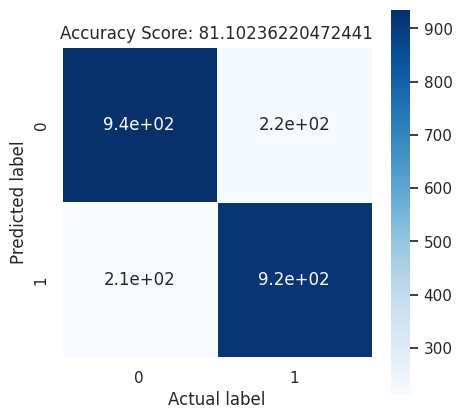

In [21]:
knn = KNeighborsClassifier() #no random_state=0
ModelEval(knn,x_train,x_test,y_train,y_test)

Accuracy Score:  90.33 %
F1-Score:  0.9019085663559698
Precision Score:  0.9055258467023173
Recall Score:  0.8983200707338639


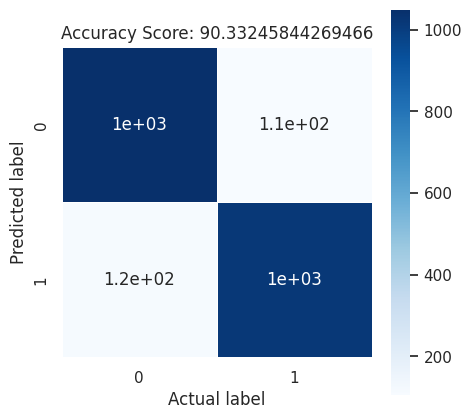

In [22]:
ada = AdaBoostClassifier(random_state=0)
ModelEval(ada,x_train,x_test,y_train,y_test)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score:  84.08 %
F1-Score:  0.8389380530973451
Precision Score:  0.8396811337466785
Recall Score:  0.8381962864721485


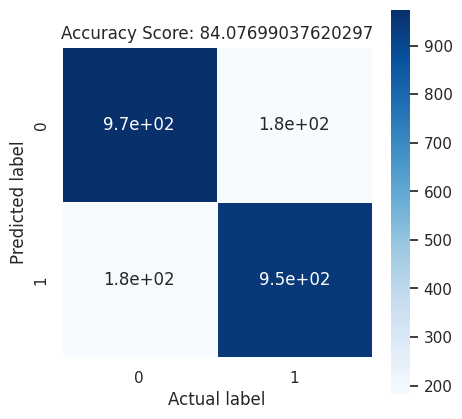

In [23]:
lr = LogisticRegression(random_state = 0)
ModelEval(lr,x_train,x_test,y_train,y_test)

Accuracy Score:  89.72 %
F1-Score:  0.8960636886333481
Precision Score:  0.8964601769911504
Recall Score:  0.8956675508399646


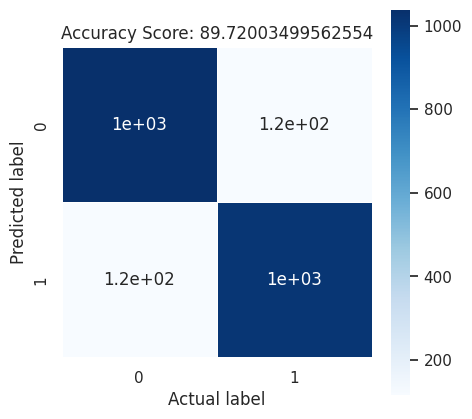

In [24]:
dtree=DecisionTreeClassifier(random_state=0) # random_state=0 ensures the trees are built the same way each time 
ModelEval(dtree,x_train,x_test,y_train,y_test)

In [25]:
#model: any ML model (e.g., DecisionTree, RandomForest, etc.)
#x_train, x_test: training and testing feature sets
#y_train, y_test: training and testing labels
def ModelEval(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train) #used to train the model using the training dataset
    y_pred=model.predict(x_test) # Uses the trained model to predict the target values for the test data.
    print("Accuracy Score: ",round(accuracy_score(y_test,y_pred)*100,2),"%") # Overall, how many predictions were correct
    print("F1-Score: ",f1_score(y_test,y_pred)) # Harmonic mean of precision and recall.Best when you want balance between precision and recall(for imbalanced datasets)
    print("Precision Score: ",precision_score(y_test,y_pred)) # Out of the predicted positives, how many were actually positive
    print("Recall Score: ",recall_score(y_test,y_pred)) # Out of the actual positives how many were correctly predicted
    if hasattr(model,"feature_importances_"):  # remember to write in single quote
        imp_df=pd.DataFrame({
            "Feature Name":x_train.columns,
            "Importance":model.feature_importances_
        })
        fi=imp_df.sort_values(by="Importance",ascending=False)
        plt.figure(figsize=(10,8))
        sns.barplot(data=fi,x="Importance",y="Feature Name")
        plt.title("Feature Importance by Attributes",fontsize=18)
        plt.xlabel("Importance",fontsize=16)
        plt.ylabel("Feature Name",fontsize=16)
        plt.show()
    else:
        print("No feature importance available for this model")

Accuracy Score:  89.72 %
F1-Score:  0.8960636886333481
Precision Score:  0.8964601769911504
Recall Score:  0.8956675508399646


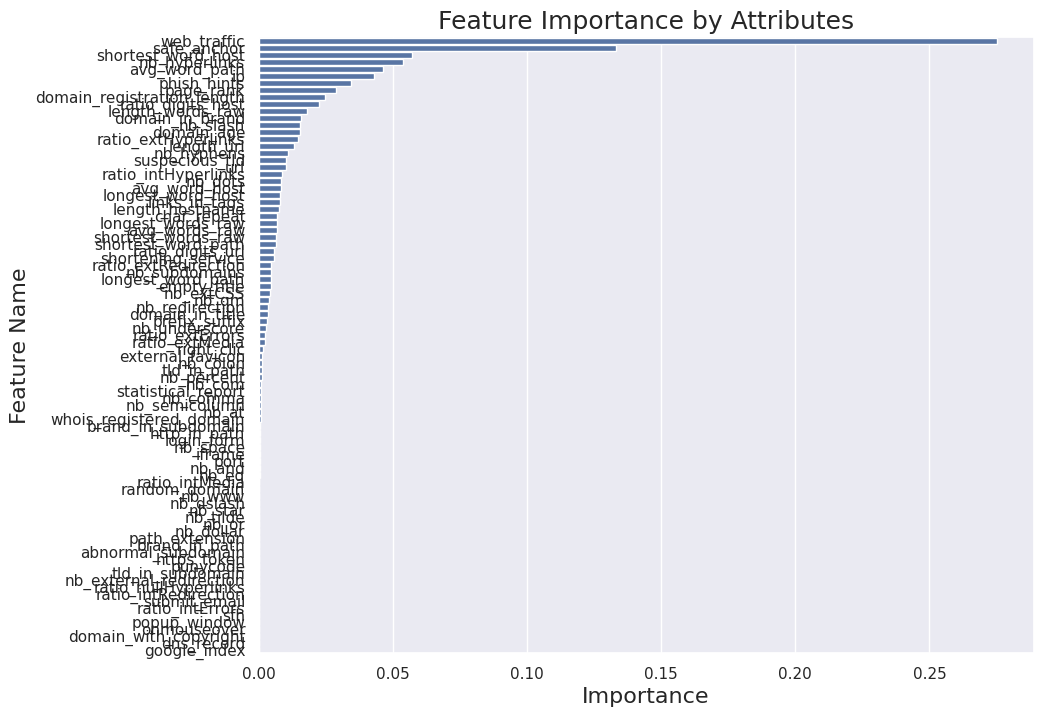

In [26]:
dtree=DecisionTreeClassifier(random_state=0) # random_state=0 ensures the trees are built the same way each time 
ModelEval(dtree,x_train,x_test,y_train,y_test)

Accuracy Score:  93.88 %
F1-Score:  0.9375557537912578
Precision Score:  0.945994599459946
Recall Score:  0.9292661361626879


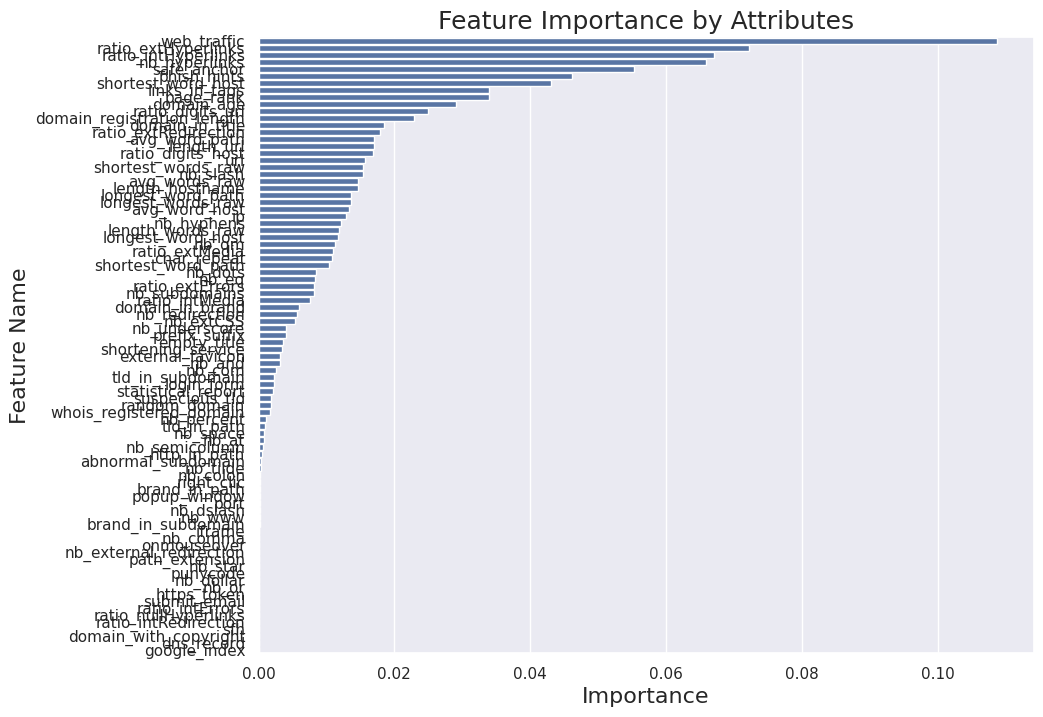

In [27]:
rfc=RandomForestClassifier(random_state=0)
ModelEval(rfc,x_train,x_test,y_train,y_test)

Accuracy Score:  90.33 %
F1-Score:  0.9019085663559698
Precision Score:  0.9055258467023173
Recall Score:  0.8983200707338639


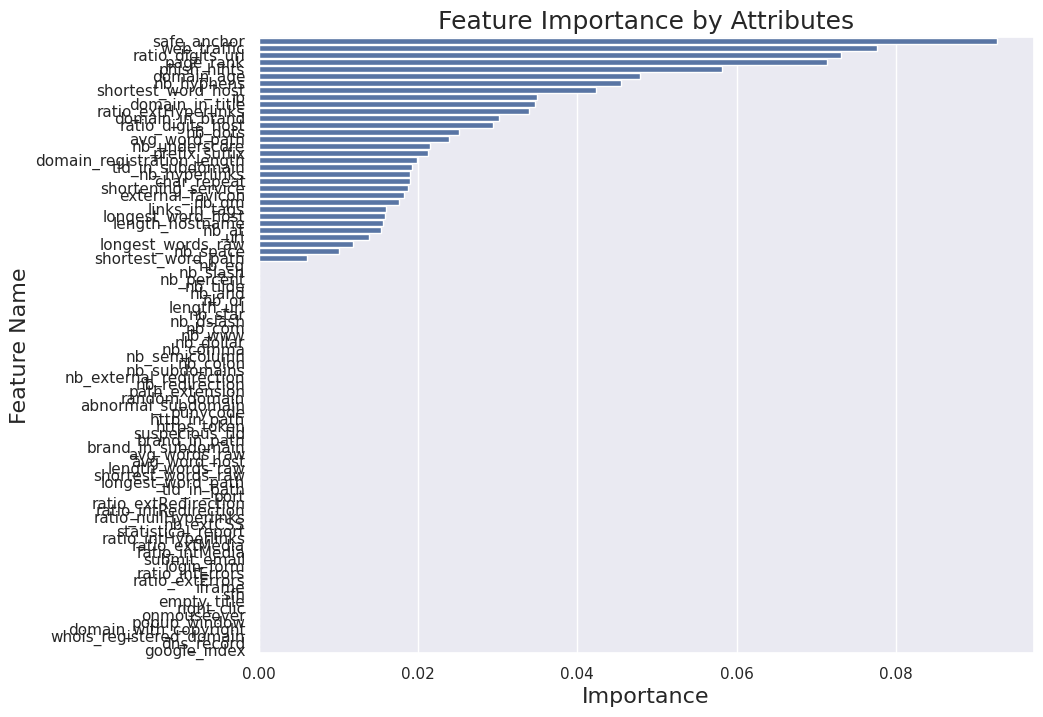

In [28]:
ada=AdaBoostClassifier(random_state=0)
ModelEval(ada,x_train,x_test,y_train,y_test)

In [29]:
log=LogisticRegression(random_state=0)
ModelEval(log,x_train,x_test,y_train,y_test)

Accuracy Score:  84.08 %
F1-Score:  0.8389380530973451
Precision Score:  0.8396811337466785
Recall Score:  0.8381962864721485
No feature importance available for this model


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
def ModelEval(model, x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    y_pred= model.predict(x_test)
    mae = metrics.mean_absolute_error(y_test,y_pred)
    mse = metrics.mean_squared_error(y_test,y_pred)
    r2 = metrics.r2_score(y_test,y_pred)
    rmse = math.sqrt(mse)
    print("MAE score is ",mae)
    print("MSE score is ",mse)
    print("R2 score is ",r2)
    print("RMSE score is ",rmse)

In [31]:
dtree=DecisionTreeRegressor(random_state=0) # random_state=0 ensures the trees are built the same way each time 
ModelEval(dtree, x_train,x_test,y_train,y_test)

MAE score is  0.1036745406824147
MSE score is  0.1036745406824147
R2 score is  0.5852561231871577
RMSE score is  0.32198531128362784


In [32]:
ada = AdaBoostRegressor(random_state=0)
ModelEval(ada, x_train,x_test,y_train,y_test)

MAE score is  0.3037234625806951
MSE score is  0.11376016233864988
R2 score is  0.5449091894246234
RMSE score is  0.3372835043974874


In [33]:
rf = RandomForestRegressor(random_state=0)
ModelEval(rf, x_train,x_test,y_train,y_test)

MAE score is  0.1248075240594926
MSE score is  0.05459173228346457
R2 score is  0.7816089992765854
RMSE score is  0.23364873696098717
